---
<h1 style="text-align: center;">Geração de Número Aleatório:</h1>
<h2 style="text-align: center;">Retorno Ibovespa</h2>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 30/07/2024

---
---

# Introdução

## Biblioteca utilizadas
1) yfinance -> dados finanças;

1) pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib e seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [59]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ks_2samp
from scipy.stats import t, norm, uniform


In [60]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")

In [61]:
# Obtendo os dados na COGN3 pelo Yahoo Finance
data = yf.download("^BVSP", start="2020-04-27", end="2024-07-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed

In [62]:
# Criando uma variável que contêm os retornos
ret = data.pct_change().dropna()

# Ordenar os retornos
ret_sort = np.sort(ret)


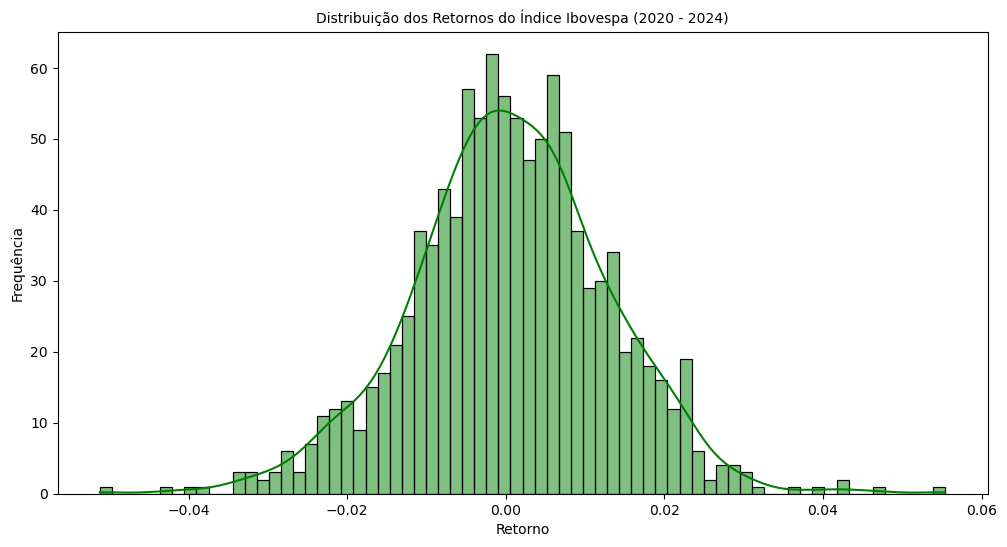

In [63]:
# Plotando o histograma dos retornos
plt.figure(figsize=(12,6))
sns.histplot(ret, kde=True, bins=70, color='green')
plt.title("Distribuição dos Retornos do Índice Ibovespa (2020 - 2024)", fontsize=10)
plt.xlabel("Retorno")
plt.ylabel("Frequência")
plt.show()

In [64]:
# Número de amostras desejadas
n = len(ret)

# Médidas dos retornos
media_ret = ret.mean()
dp_ret = ret.std()

In [65]:
# Gerando valores aleatorios
X = []
for i in range(n):
  X.append(dp_ret * np.sqrt(12 / 100000) * (np.random.uniform(0, 1, 100000).sum() - 100000 / 2) + media_ret)
X = np.array(X)
X_sort = np.sort(X)

In [66]:
print("μ_{ret} = ", media_ret, "\n", "σ_{ret} = ", dp_ret, '\n')
print("μ_{X} = ", X.mean(), "\nσ_{X} = ", X.std())

μ_{ret} =  0.0005352541442946981 
 σ_{ret} =  0.012500951090858341 

μ_{X} =  0.00034609229977199503 
σ_{X} =  0.012352303813962724


In [67]:
# Calcular a ECDF manualmente
Fn = np.arange(1, n + 1) / n

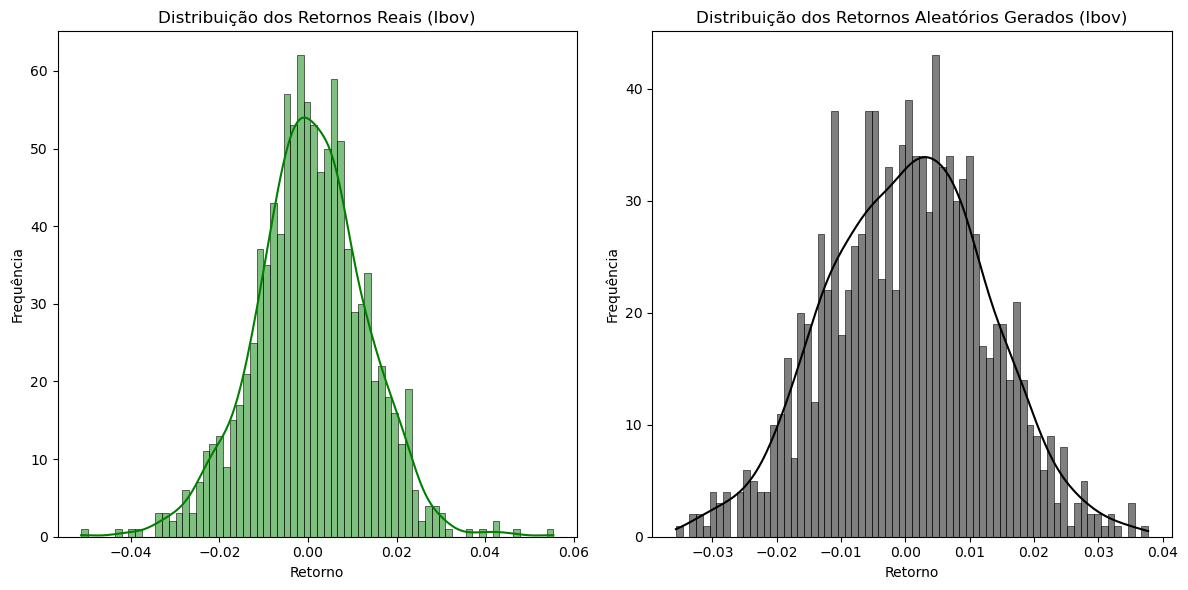

In [68]:
# Plotando os histogramas para comparação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ret, kde=True, bins=70, color='green')
plt.title('Distribuição dos Retornos Reais (Ibov)')
plt.xlabel('Retorno')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(X, kde=True, bins=70, color='black')
plt.title('Distribuição dos Retornos Aleatórios Gerados (Ibov)')
plt.xlabel('Retorno')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

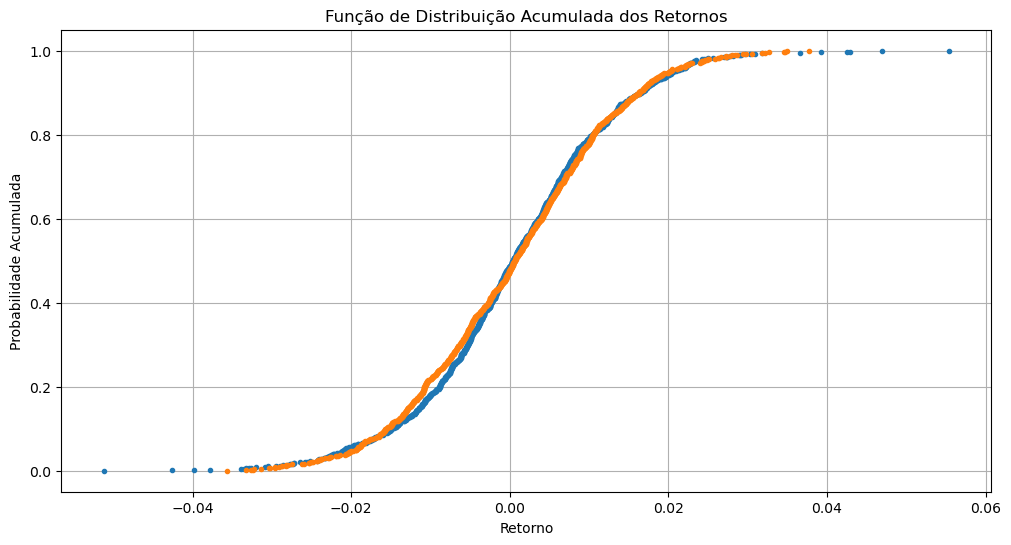

In [76]:
# Plotar a ECDF
plt.figure(figsize=(12, 6))
plt.plot(ret_sort, Fn, marker='.', linestyle='none', label='Retornos Reais (Ibov)')
plt.plot(X_sort, Fn, marker='.', linestyle='none', label='Retornos Aleatórios (Ibov)')
plt.title('Função de Distribuição Acumulada dos Retornos')
plt.xlabel('Retorno')
plt.ylabel('Probabilidade Acumulada')
plt.grid(True)
plt.show()

In [70]:
dados_norm = np.sort(np.random.normal(0, 1, n))
Fn_norm = norm.cdf(dados_norm)

In [71]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [72]:
# Preencher D_1 e D_2
for i in range(n):
    D1[i] = 1 / n - Fn_norm[i]
    D2[i] = Fn_norm[i] - (i - 1) / n

# Calcular D_calc
D_calc = np.max(np.maximum(D1, D2))

In [73]:
# Simulação do p-valor
alpha = 0.05  # nível de significância
n_rep = 10000

In [74]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [75]:

contador = 0
for _ in range(n_rep):
    aux = np.sort(np.random.uniform(0, 1, n))
    for j in range(len(aux)):
        D1[j] = j/n - uniform.cdf(aux[j])
        D2[j] = uniform.cdf(aux[j]) - (j - 1) / n
    D = np.max(np.maximum(D1, D2))
    if D >= D_calc:
        contador += 1

pvalor = contador / n_rep

if pvalor < alpha:
    print("Rejeite H_0")
else:
    print("Não rejeite H_0")

print(f'Estatística do teste D: {D_calc}')
print(f'Valor-p: {pvalor}')

Não rejeite H_0
Estatística do teste D: 0.02931270986463419
Valor-p: 0.3253


In [82]:
dados_ts1 = np.sort(t.rvs(n - 1, size=n))
Fn_ts1 = t.cdf(dados_ts1, n - 1)

In [83]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [84]:
# Preencher D_1 e D_2
for i in range(n):
    D1[i] = 1 / n - Fn_norm[i]
    D2[i] = Fn_norm[i] - (i - 1) / n

# Calcular D_calc
D_calc = np.max(np.maximum(D1, D2))

In [85]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [86]:

contador = 0
for _ in range(n_rep):
    aux = np.sort(np.random.uniform(0, 1, n))
    for j in range(len(aux)):
        D1[j] = j/n - uniform.cdf(aux[j])
        D2[j] = uniform.cdf(aux[j]) - (j - 1) / n
    D = np.max(np.maximum(D1, D2))
    if D >= D_calc:
        contador += 1

pvalor = contador / n_rep

if pvalor < alpha:
    print("Rejeite H_0")
else:
    print("Não rejeite H_0")

print(f'Estatística do teste D: {D_calc}')
print(f'Valor-p: {pvalor}')

Não rejeite H_0
Estatística do teste D: 0.02931270986463419
Valor-p: 0.3254


In [77]:
dados_ts2 = np.sort(t.rvs(n - 2, size=n))
Fn_ts2 = t.cdf(dados_ts2, n - 2)

In [78]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [79]:
# Preencher D_1 e D_2
for i in range(n):
    D1[i] = 1 / n - Fn_norm[i]
    D2[i] = Fn_norm[i] - (i - 1) / n

# Calcular D_calc
D_calc = np.max(np.maximum(D1, D2))

In [80]:
D1 = np.zeros(n)
D2 = np.zeros(n)

In [81]:

contador = 0
for _ in range(n_rep):
    aux = np.sort(np.random.uniform(0, 1, n))
    for j in range(len(aux)):
        D1[j] = j/n - uniform.cdf(aux[j])
        D2[j] = uniform.cdf(aux[j]) - (j - 1) / n
    D = np.max(np.maximum(D1, D2))
    if D >= D_calc:
        contador += 1

pvalor = contador / n_rep

if pvalor < alpha:
    print("Rejeite H_0")
else:
    print("Não rejeite H_0")

print(f'Estatística do teste D: {D_calc}')
print(f'Valor-p: {pvalor}')

Não rejeite H_0
Estatística do teste D: 0.02931270986463419
Valor-p: 0.3171
